In [69]:
import glob

from packaging import version

from matplotlib import pyplot as plt
import tensorboard as tb
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import os
import struct
from bbf.utils import load_plot_config, moving_average

In [70]:
load_plot_config(use_latex=False)

In [71]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.11.2


In [72]:
!pwd

/home/rodrigo/SSD/Projects/bbf_UPER/notebooks


In [73]:
#ex_result = "/nfs/nhome/live/rcdavis/bbf_UPER/results/default/ChopperCommand_default_1/"
ex_result = "/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_quant/ChopperCommand_UPER_quant_1/"
abs_path = "/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/"

In [74]:
ea = event_accumulator.EventAccumulator(os.path.join(ex_result, 'events.out.tfevents.1733112749.gpu-xd670-30.3486206.0.v2'),
                                        size_guidance={event_accumulator.TENSORS: 0})

In [75]:
ea.Reload()

In [76]:
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': [],
 'distributions': [],
 'tensors': ['DQNLoss',
  'GradNorm',
  'SPRLoss',
  'TD Error',
  'TotalLoss',
  'batchDQNLoss',
  'batch_info_gain_cat',
  'batch_info_gain_quant',
  'batch_td_error',
  'information_gain_cat_reward',
  'information_gain_quant_reward',
  'PNorm',
  'Inter-batch time',
  'Training time',
  'Sampling time',
  'Set priority time',
  'Online Churn',
  'Target Churn',
  'Online-Target Agreement',
  'Online Off-Policy Rate',
  'Target Off-Policy Rate',
  'Train/EpisodeLength',
  'Train/EpisodeReturn',
  'Train/EpisodeNormalizedScore',
  'train_episode_returns',
  'train_episode_lengths',
  'Train/NumEpisodes',
  'Train/AverageReturns',
  'Train/AverageNormalizedScore',
  'Train/AverageStepsPerSecond',
  'Eval/NumEpisodes',
  'Eval/AverageReturns',
  'Eval/NormalizedScore'],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [77]:
ea.Tensors('Train/EpisodeNormalizedScore')[0].step

2104

In [78]:
b = ea.Tensors('Train/EpisodeNormalizedScore')[0].tensor_proto.tensor_content

In [79]:
b

b'rDr='

In [80]:
struct.unpack('f', b)[0]

0.05914730578660965

In [81]:
def accumulator_to_float(ea, tag):
  wall_time, step, value = [], [], []
  for event in ea.Tensors(tag):
      wall_time.append(event.wall_time)
      step.append(event.step)
      tensor_val = struct.unpack("f", event.tensor_proto.tensor_content)[0]
      value.append(tensor_val)
  wall_time = np.array(wall_time)
  step = np.array(step)
  value = np.array(value)
  return wall_time, step, value

def get_training_data(model, run, game, tag, abs_path):
    run_path = os.path.join(abs_path, model, game + "_" + model + "_" + str(run))
    event_path = glob.glob(run_path + "/events*")[0]
    print(event_path)
    ea = event_accumulator.EventAccumulator(event_path, size_guidance={event_accumulator.TENSORS: 0})
    ea.Reload()
    wall_time, step, value = accumulator_to_float(ea, tag)
    return wall_time, step, value

In [82]:
wall_time, step, value = accumulator_to_float(ea, 'Train/EpisodeNormalizedScore')
wall_time, step, value = get_training_data("UPER_quant", 1, "ChopperCommand", 'Train/EpisodeNormalizedScore', abs_path)

/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_quant/ChopperCommand_UPER_quant_1/events.out.tfevents.1733112749.gpu-xd670-30.3486206.0.v2


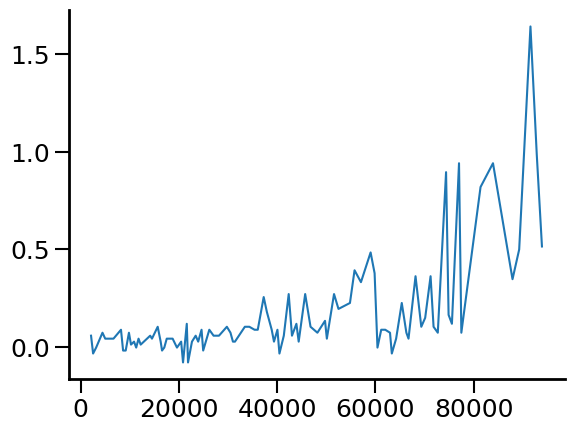

In [83]:
plt.plot(step, value)
plt.show()

In [84]:
all_results_dir = "/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/"
all_runs_list_dir = glob.glob(all_results_dir + "/*/")
model_list = [p.split("/")[-2] for p in all_runs_list_dir]
all_games = ["Asterix",
             "ChopperCommand",
             "Assault",
             "Centipede",
             "BeamRider",
             "Amidar",
             "Phoenix"]

sets = ["Train"]

labels = {'default': "ENS-BBF",
          'UPER_cat_r': "UPER_C_R",
          'baseline': "BBF",
          'UPER_quant': "UPER_Q",
          'UPER_cat': "UPER_C",
          'PER': "PER",
          'UPER_quant_r': "UPER_Q_R"}

colors = {"UPER_quant": "C2",
          "PER": "C0",
          "baseline": "C1",
          "UPER_quant_r": "C3",
          "UPER_cat": "C4",
          "UPER_cat_r": "C5",
          "default": "black"}

model_list = ['default',
  #'UPER_cat_r',
  'baseline',
  'UPER_quant',
  'UPER_cat',
  'PER']
  #'UPER_quant_r']

In [85]:
all_runs_list_dir, model_list

(['/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_cat_r/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/baseline/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_quant/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_cat/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/PER/',
  '/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/UPER_quant_r/'],
 ['default', 'baseline', 'UPER_quant', 'UPER_cat', 'PER'])

In [86]:
raw_results = {}
game_mean = {}
game_std = {}
norm_game_mean = {}
norm_game_std = {}
all_games_mean = {}
all_games_std = {}
all_games_median = {}
all_games_low_interval = {}
all_games_upper_interval = {}
WINDOW_SIZE = 10

In [93]:
common_steps_base = np.arange(0, 100000)
for i, model in enumerate(model_list):
    for game in all_games:
        smooth_values = []
        normalized_smooth_values = []
        for seed in range(1, 4):
          wall_time, step, value = get_training_data(model, seed, game, 'Train/EpisodeNormalizedScore', all_results_dir)
          # Linearly interpolate value to common steps
          smooth_val = moving_average(value, window_size=WINDOW_SIZE)
          inter_value = np.interp(common_steps_base, step, smooth_val)
          
          normalized_smooth_values.append(inter_value)
          #norm_score = get_human_normalized_score(game=game, raw_score=value)
          #for i in range(len(game_frame)):
            # run_data_path = ""
            # ea = event_accumulator.EventAccumulator(os.path.join(ex_result, 'events.out.tfevents.1733112749.gpu-xd670-30.3486206.0.v2'),
            #                         size_guidance={event_accumulator.TENSORS: 0})
            # raw_score = game_frame.values[i, 2:].astype(float)
            # norm_score = get_human_normalized_score(game=game, raw_score=raw_score)
            # smooth_values.append(moving_average(raw_score, window_size=WINDOW_SIZE))
            # normalized_smooth_values.append(moving_average(norm_score, window_size=WINDOW_SIZE))
        #smooth_values = np.stack(smooth_values, axis=0)
        normalized_smooth_values = np.stack(normalized_smooth_values, axis=0)
        #game_mean[(model, s, game)] = np.mean(smooth_values, axis=0)
        #game_std[(model, s, game)] = np.std(smooth_values, axis=0)
        norm_game_mean[(model, game)] = np.median(normalized_smooth_values, axis=0)
        norm_game_std[(model, game)] = np.std(normalized_smooth_values, axis=0)
        #average_std.append(norm_game_mean[(model, s, game)])
    #all_games_std[(model, s)] = np.std(np.stack(average_std, axis=0), axis=0)

/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_1/events.out.tfevents.1733028891.gpu-xd670-30.3272142.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_2/events.out.tfevents.1733033959.gpu-xd670-30.3290762.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_3/events.out.tfevents.1733038865.gpu-xd670-30.3308635.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_1/events.out.tfevents.1733029527.gpu-xd670-30.3273957.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_2/events.out.tfevents.1733034365.gpu-xd670-30.3292407.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_3/events.out.tfevents.1733039320.gpu-xd670-30.3311525.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Assault_default_1/events.out.tfevents.1733030098.gpu-

In [94]:
all_games

['Asterix',
 'ChopperCommand',
 'Assault',
 'Centipede',
 'BeamRider',
 'Amidar',
 'Phoenix']

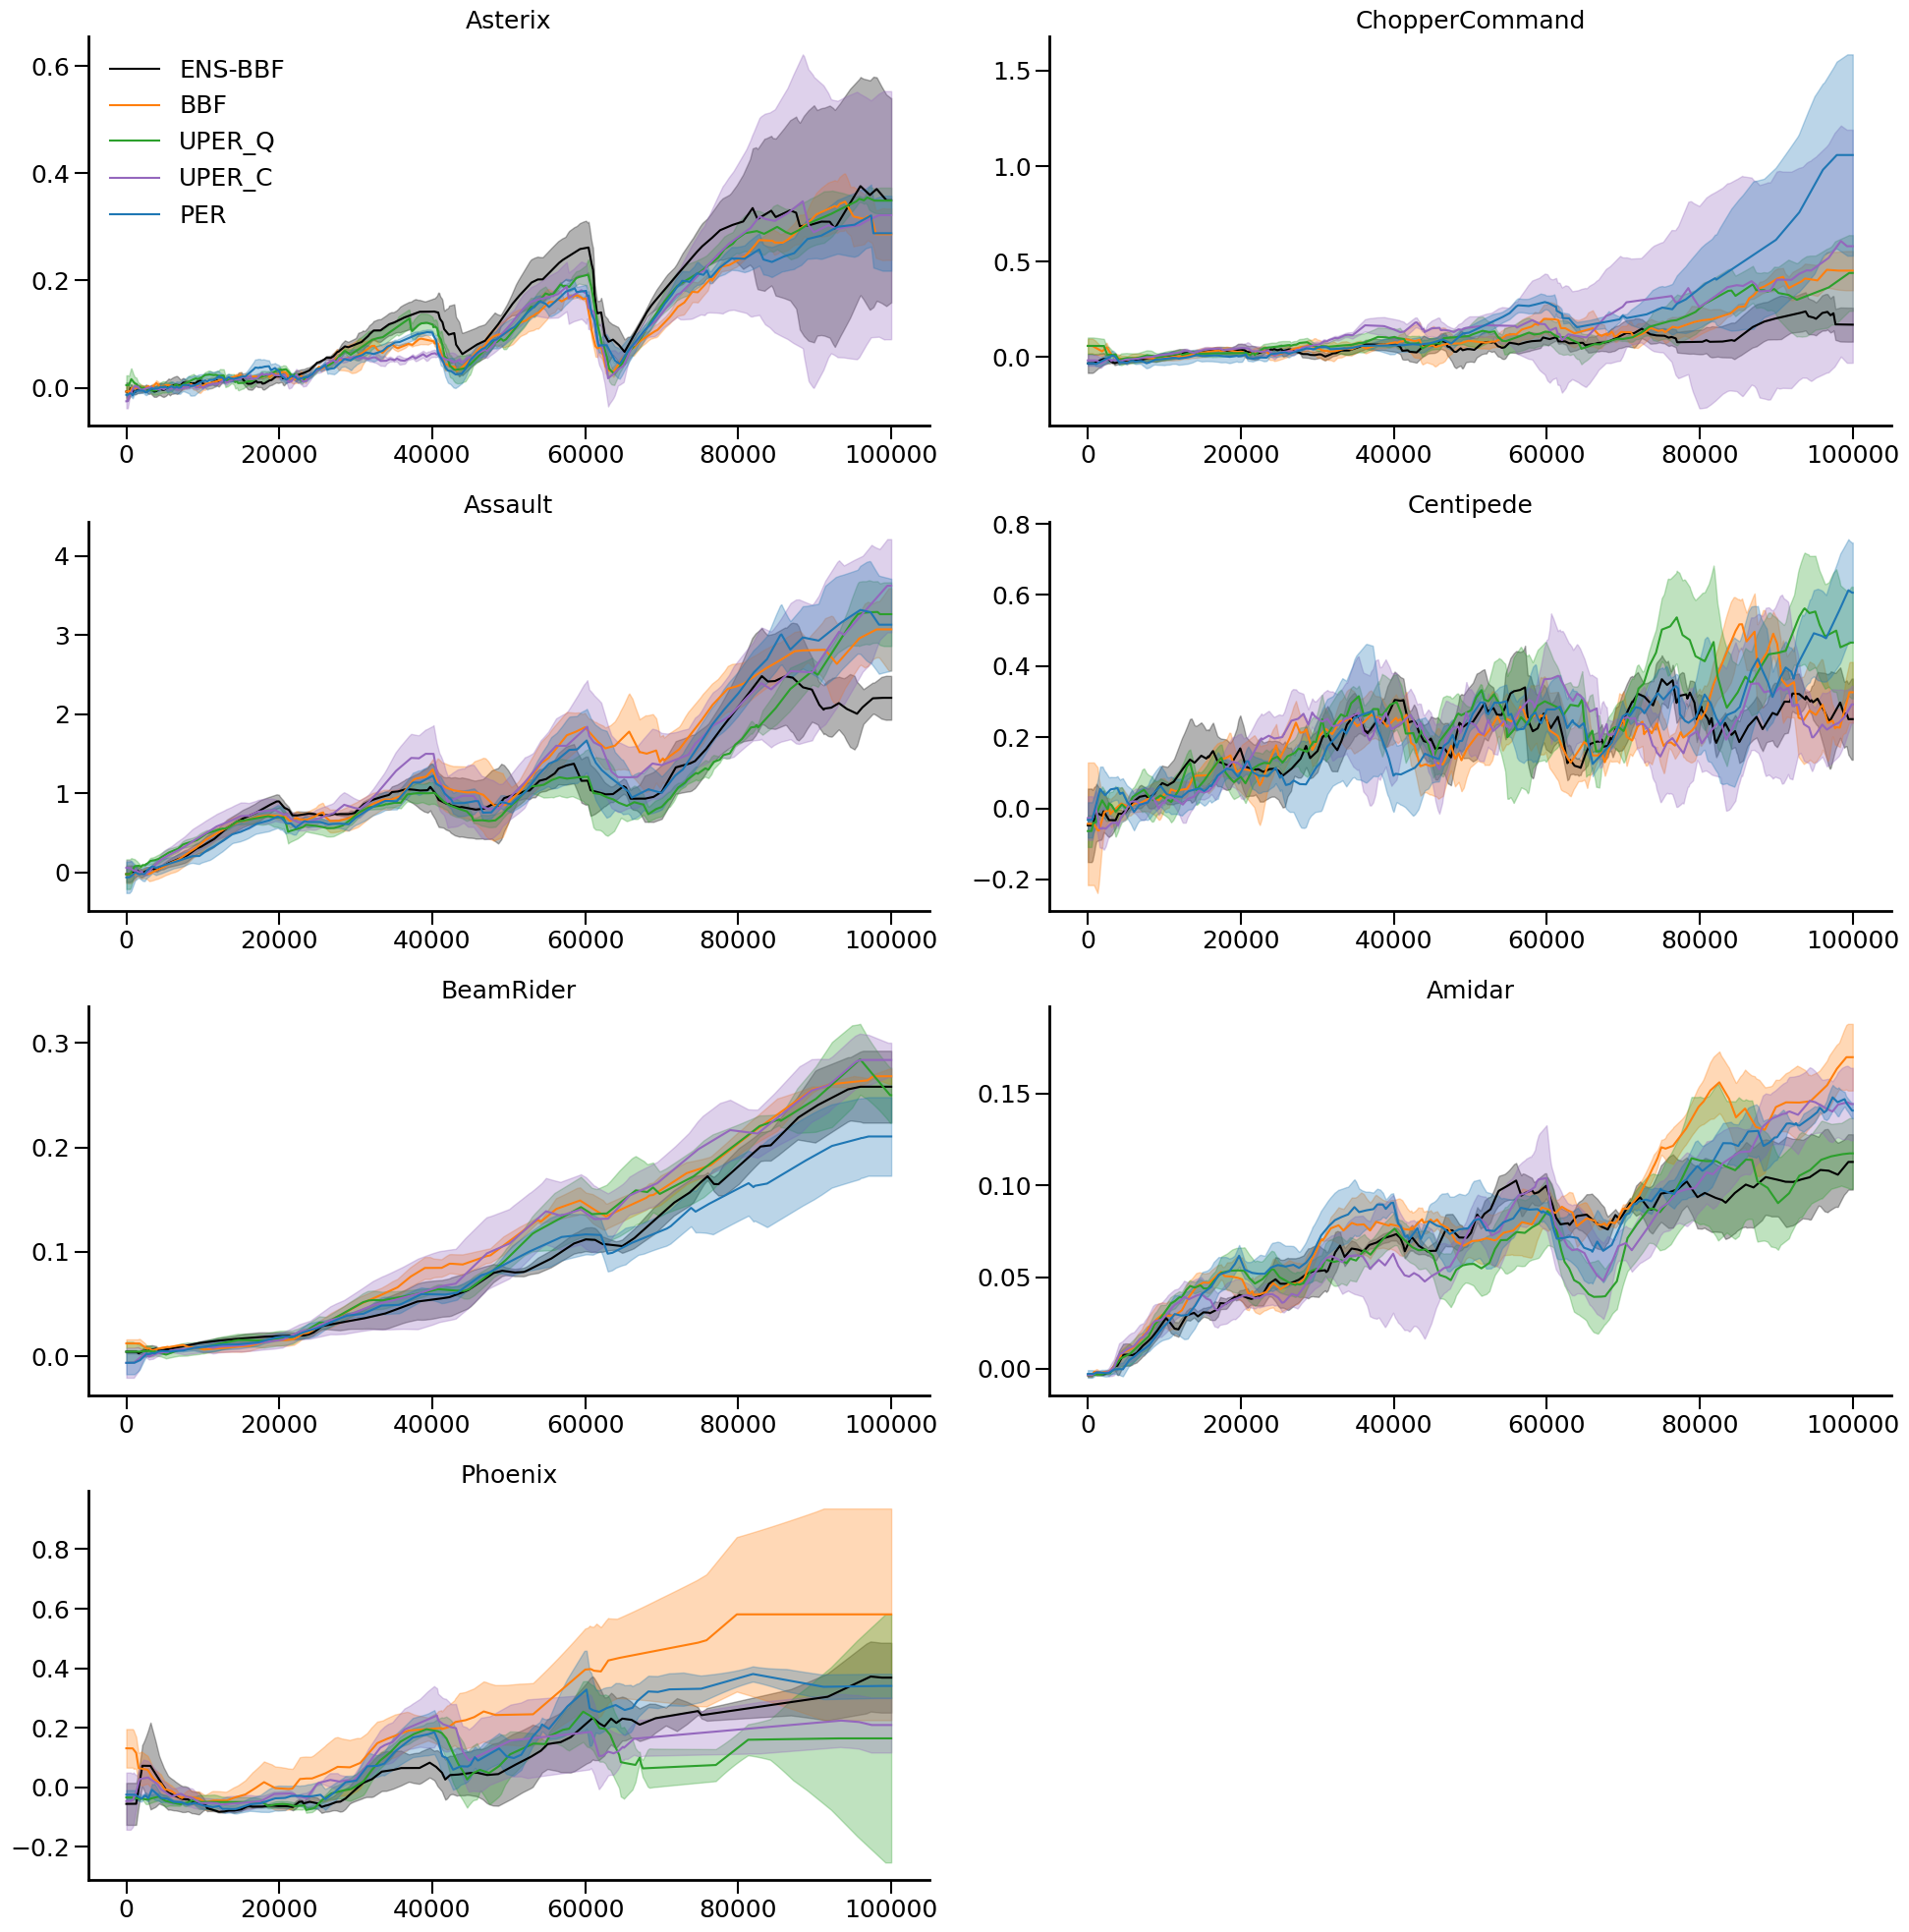

In [98]:
kernel_size = 1
f, ax = plt.subplots(4, 2, figsize=(20, 20))
ax = ax.flatten()
for i, game in enumerate(all_games):
    for model in model_list:
        x = common_steps_base
        y1 = norm_game_mean[(model, game)] - 2/np.sqrt(3)*norm_game_std[(model, game)]
        y2 = norm_game_mean[(model, game)] + 2/np.sqrt(3)*norm_game_std[(model, game)]
        ax[i].fill_between(x=x, y1=y1, y2=y2, color=colors[model], alpha=0.3)
        if i == 0:
            ax[i].plot(norm_game_mean[(model, game)], color=colors[model], label=labels[model])
        else:
            ax[i].plot(norm_game_mean[(model, game)], color=colors[model])
    ax[i].set_title(game)
# Put legend on the upper left corner
ax[0].legend(loc='upper left', frameon=False)
ax[-1].axis('off')
f.tight_layout()

In [100]:
common_steps_base = np.arange(0, 100000)
all_games_std = {}
all_games_mean = {}
for i, model in enumerate(model_list):
    seeds_median = []
    for game in all_games:
        all_games_seed = []
        for seed in range(1, 4):
          wall_time, step, value = get_training_data(model, seed, game, 'Train/EpisodeNormalizedScore', all_results_dir)
          inter_value = np.interp(common_steps_base, step, value)
          all_games_seed.append(inter_value)
        all_games_seed = np.stack(all_games_seed, axis=0)
        seeds_median.append(np.median(all_games_seed, axis=0))
    seeds_median = np.stack(seeds_median, axis=0)
    all_games_std[model] = np.std(seeds_median, axis=0)
    all_games_mean[model] = np.mean(seeds_median, axis=0) 

/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_1/events.out.tfevents.1733028891.gpu-xd670-30.3272142.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_2/events.out.tfevents.1733033959.gpu-xd670-30.3290762.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Asterix_default_3/events.out.tfevents.1733038865.gpu-xd670-30.3308635.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_1/events.out.tfevents.1733029527.gpu-xd670-30.3273957.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_2/events.out.tfevents.1733034365.gpu-xd670-30.3292407.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/ChopperCommand_default_3/events.out.tfevents.1733039320.gpu-xd670-30.3311525.0.v2
/home/rodrigo/SSD/Projects/bbf_UPER/results/proper_td_error/default/Assault_default_1/events.out.tfevents.1733030098.gpu-

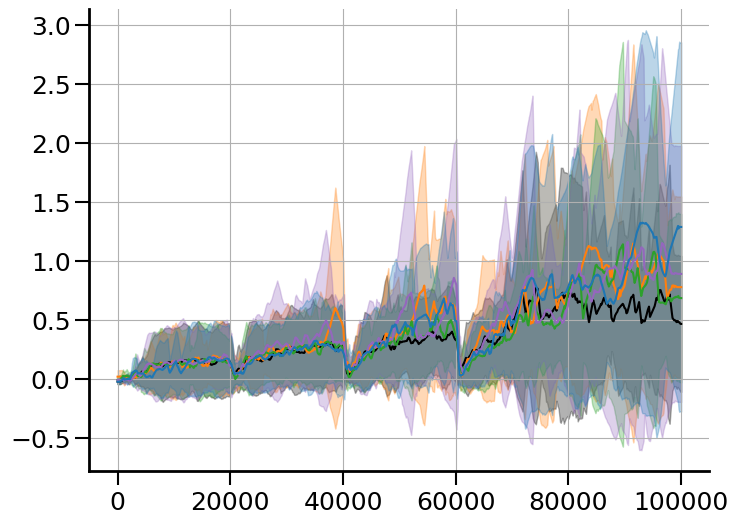

In [102]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
for model in model_list:
    x = common_steps_base
    y1 = all_games_mean[model] - all_games_std[model]
    y2 = all_games_mean[model] + all_games_std[model]
    #y1 = all_games_low_interval[(model, dataset)]
    #y2 = all_games_upper_interval[(model, dataset)]
    ax.fill_between(x=x, y1=moving_average(y1, WINDOW_SIZE), y2=moving_average(y2, WINDOW_SIZE), color=colors[model], alpha=0.3)
    ax.plot(moving_average(all_games_mean[model], WINDOW_SIZE), color=colors[model], label=model)
ax.grid()